In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import MinMaxScaler


## ADASYN Random over-sampling Evaluation

In [2]:
df= pd.read_csv('heart2020python.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,8,4,2,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,13,4,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,10,4,2,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,12,4,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,5,4,0,1,2,8,0,0,0


In [3]:
df.drop(['DiffWalking',"SleepTime"],axis=1,inplace=True)
df.shape
df['HeartDisease'].value_counts()


HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## splite data

In [5]:
x = df.drop(["HeartDisease"] , axis = 1).values
y = df["HeartDisease"].values

In [6]:
x_AD, y_AD = ADASYN(random_state=42).fit_resample(x, y)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_AD, y_AD, test_size=0.25, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train3 = scaler.fit_transform(x_train3)
x_test3 = scaler.transform(x_test3)

## random forest

In [8]:


# # Inicjalizacja modelu z domyślnymi parametrami
# rf = RandomForestClassifier()

# # Określenie siatki parametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew
#     'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
#     'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
# }

# # Utworzenie obiektu GridSearchCV
# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# cv_rf.fit(x_train3, y_train3)

# # Najlepszy zestaw parametrów
# print("Najlepsze parametry: ", cv_rf.best_params_)

# # Najlepszy estimator
# best_rf = cv_rf.best_estimator_

params = {
    'n_estimators': 300,  # Liczba drzew
    'max_depth': 30,        # Maksymalna głębokość drzewa
    'min_samples_split': 6,   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': 2,    # Minimalna liczba próbek wymagana w liściu
    'max_features': 'sqrt'  # Liczba cech do rozważenia przy każdym podziale
}

best_rf = RandomForestClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features'])
best_rf.fit(x_train3, y_train3)

# Predykcje i ocena modelu
ypred_train = best_rf.predict(x_train3)
ypred_test = best_rf.predict(x_test3)

print("Training Results\n")
print(classification_report(y_train3, ypred_train))
print("Test Results\n")
print(classification_report(y_test3, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test3, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
cross_val_scores = cross_val_score(best_rf, x_train3, y_train3, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

Training Results

              precision    recall  f1-score   support

           0       0.94      0.95      0.95    189618
           1       0.95      0.94      0.95    192242

    accuracy                           0.95    381860
   macro avg       0.95      0.95      0.95    381860
weighted avg       0.95      0.95      0.95    381860

Test Results

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     63243
           1       0.93      0.92      0.92     64044

    accuracy                           0.92    127287
   macro avg       0.92      0.92      0.92    127287
weighted avg       0.92      0.92      0.92    127287

Confusion Matrix:
 [[58896  4347]
 [ 5312 58732]]
Cross-validation scores: [0.9209658  0.92206568 0.92116221 0.92261562 0.91985283]
Average cross-validation score: 0.9213324254962553


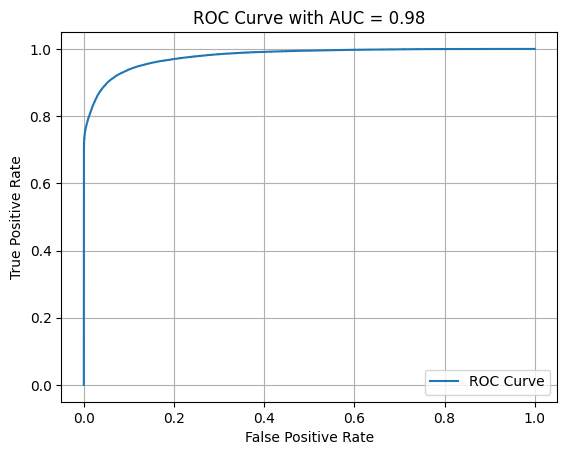

In [9]:

y_proba_test = best_rf.predict_proba(x_test3)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [10]:

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier()

# Uruchomienie Grid Search z walidacją krzyżową
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train3, y_train3)

# Wyświetlenie najlepszych parametrów i wyników
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Utworzenie i ocena modelu z najlepszymi parametrami
best_tree = grid_search.best_estimator_
best_tree.fit(x_train3, y_train3)

ypred_train2 = best_tree.predict(x_train3)
ypred_test2 = best_tree.predict(x_test3)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train3, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test3, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
cross_val_scores = cross_val_score(best_tree, x_train3, y_train3, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Najlepsze parametry: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Najlepsza dokładność: 0.8953438432933535
Training Results

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    189618
           1       0.97      0.94      0.96    192242

    accuracy                           0.96    381860
   macro avg       0.96      0.96      0.96    381860
weighted avg       0.96      0.96      0.96    381860

Testing Results

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     63243
           1       0.91      0.89      0.90     64044

    accuracy                           0.90    127287
   macro avg       0.90      0.90      0.90    127287
weighted avg       0.90      0.90      0.90    127287

Cross-Validation Scores for the Best Model: [0.8964542  0.89468653 0.89633635 0.89531504 0.89315456]
Average Cross-Validation Score: 0.8951893364060128


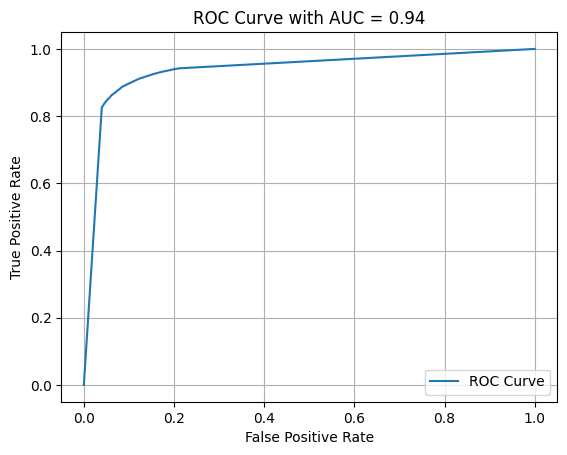

In [11]:

y_proba_test = best_tree.predict_proba(x_test3)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [12]:
Gnb = GaussianNB()
Gnb.fit(x_train3, y_train3)
ypred_train33 = Gnb.predict(x_train3)
y_pred_test33 = Gnb.predict(x_test3)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test3, y_pred_test33))

Naive Bayes Classifier Accuracy:  0.6933701006387141


In [13]:
print('Testing Results\n')
print(classification_report(y_train3, ypred_train33))

Testing Results

              precision    recall  f1-score   support

           0       0.67      0.76      0.71    189618
           1       0.73      0.63      0.67    192242

    accuracy                           0.69    381860
   macro avg       0.70      0.70      0.69    381860
weighted avg       0.70      0.69      0.69    381860



In [14]:
print('Testing Results\n')
print(classification_report(y_test3, y_pred_test33))

Testing Results

              precision    recall  f1-score   support

           0       0.67      0.77      0.71     63243
           1       0.73      0.62      0.67     64044

    accuracy                           0.69    127287
   macro avg       0.70      0.69      0.69    127287
weighted avg       0.70      0.69      0.69    127287



Cross-Validation Scores for the Best Model: [0.69364427 0.69672131 0.69305505 0.69297648 0.69673441]
Average Cross-Validation Score: 0.6946263028334991


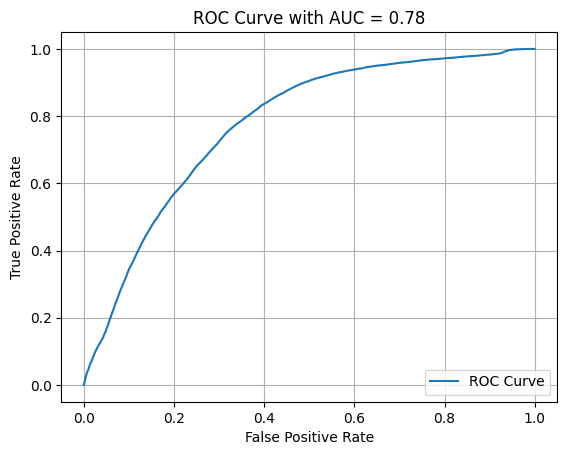

In [15]:
cross_val_scores = cross_val_score(Gnb, x_train3, y_train3, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = Gnb.predict_proba(x_test3)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST


Accuracy on Training set:  0.9127350337820144
Accuracy on Test set:  0.91186845475186

Training Results

              precision    recall  f1-score   support

           0       0.89      0.95      0.91    189618
           1       0.94      0.88      0.91    192242

    accuracy                           0.91    381860
   macro avg       0.91      0.91      0.91    381860
weighted avg       0.91      0.91      0.91    381860

Testing Results

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     63243
           1       0.94      0.88      0.91     64044

    accuracy                           0.91    127287
   macro avg       0.91      0.91      0.91    127287
weighted avg       0.91      0.91      0.91    127287

Cross-Validation Scores for the Best Model: [0.91094904 0.91128948 0.91174776 0.91249411 0.91064788]
Average Cross-Validation Score: 0.91142565338082


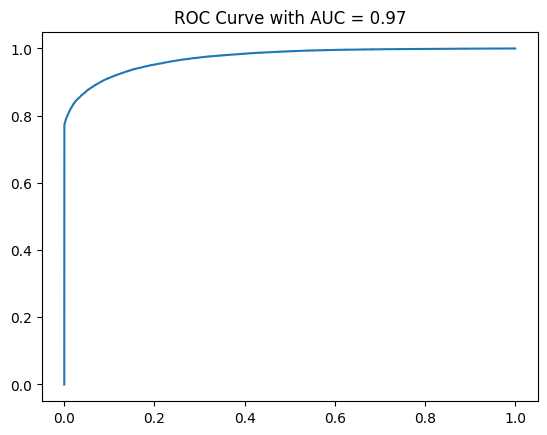

In [16]:

# xg = XGBClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train3, y_train3)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_xg = grid_search.best_estimator_

params = {
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 0.7
}

best_xg = XGBClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree'])
best_xg.fit(x_train3, y_train3)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train3)
y_pred_test4 = best_xg.predict(x_test3)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train3, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test3, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train3, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test3, y_pred_test4))

cross_val_scores = cross_val_score(best_xg, x_train3, y_train3, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test3)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test3, y_proba_test4)))
plt.show()

## logistic regression

Accuracy on Training set:  0.7444037081652962
Accuracy on Test set:  0.7442158272250897

Training Results

              precision    recall  f1-score   support

           0       0.76      0.71      0.73    189618
           1       0.73      0.78      0.75    192242

    accuracy                           0.74    381860
   macro avg       0.75      0.74      0.74    381860
weighted avg       0.75      0.74      0.74    381860

Testing Results

              precision    recall  f1-score   support

           0       0.76      0.71      0.73     63243
           1       0.73      0.78      0.75     64044

    accuracy                           0.74    127287
   macro avg       0.75      0.74      0.74    127287
weighted avg       0.75      0.74      0.74    127287

Cross-Validation Scores for the Best Model: [0.74646467 0.74476248 0.7434531  0.74391138 0.74374116]
Average Cross-Validation Score: 0.7444665584245536


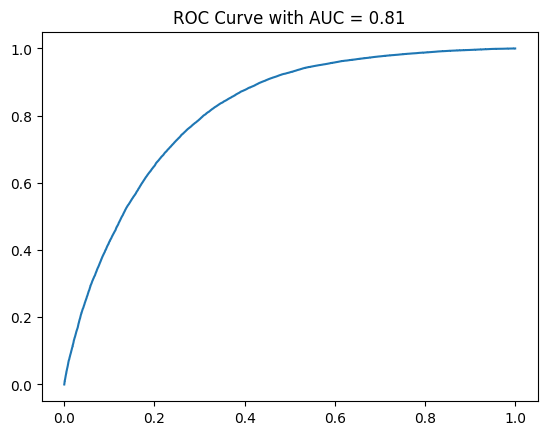

In [17]:

# lg = LogisticRegression()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
#     'penalty': ['l1', 'l2'],       # Typ regularyzacji
#     'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train3, y_train3)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_lg = grid_search.best_estimator_

params = {
    'C': 0.01,
    'penalty': 'l1',
    'solver': 'liblinear'
}

best_lg = LogisticRegression(
    C=params['C'],
    penalty=params['penalty'],
    solver=params['solver'])
best_lg.fit(x_train3, y_train3)


# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train3)
y_pred_test4 = best_lg.predict(x_test3)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train3, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test3, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train3, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test3, y_pred_test4))

cross_val_scores = cross_val_score(best_lg, x_train3, y_train3, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test3)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test3, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

Accuracy on Training set:  0.9204080029330121
Accuracy on Test set:  0.9185855586194976

Training Results

              precision    recall  f1-score   support

           0       0.90      0.95      0.92    189618
           1       0.95      0.89      0.92    192242

    accuracy                           0.92    381860
   macro avg       0.92      0.92      0.92    381860
weighted avg       0.92      0.92      0.92    381860

Testing Results

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     63243
           1       0.95      0.89      0.92     64044

    accuracy                           0.92    127287
   macro avg       0.92      0.92      0.92    127287
weighted avg       0.92      0.92      0.92    127287

Cross-Validation Scores for the Best Model: [0.91703766 0.91796732 0.91767925 0.91804588 0.9158985 ]
Average Cross-Validation Score: 0.917325721468601


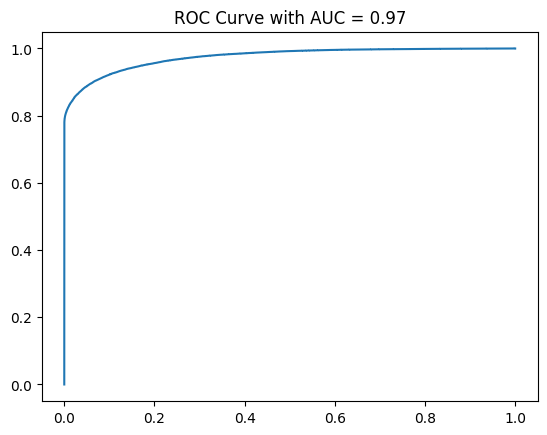

In [18]:


# # Inicjalizacja modelu Gradient Boosting Classifier
# gb = GradientBoostingClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
#     'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
#     'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train3, y_train3)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_gb = grid_search.best_estimator_

params = {
    'n_estimators': 200,
    'learning_rate': 0.2,
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

best_gb = GradientBoostingClassifier(
    n_estimators=params['n_estimators'],
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'])
best_gb.fit(x_train3, y_train3)

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train3)
y_pred_test6 = best_gb.predict(x_test3)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train3, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test3, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train3, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test3, y_pred_test6))

cross_val_scores = cross_val_score(best_gb, x_train3, y_train3, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test3)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test3, y_proba_test6)))
plt.show()

## KNN

In [19]:
knn = KNeighborsClassifier()
knn.fit(x_train3, y_train3)

KNeighborsClassifier()

In [20]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)

In [21]:
grid_cv.fit(x_train3, 
            y_train3)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [22]:
grid_cv.best_score_

0.894548074251855

In [23]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [24]:
ypred_train83 = grid_cv.predict(x_train3)
y_pred_test83 = grid_cv.predict(x_test3)
print("XGBClassifier Accuracy: ",accuracy_score(y_test3, y_pred_test83))

XGBClassifier Accuracy:  0.9012232199674751


In [25]:
print("Training Results\n")
print(classification_report(y_train3, ypred_train83))

Training Results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    189618
           1       1.00      1.00      1.00    192242

    accuracy                           1.00    381860
   macro avg       1.00      1.00      1.00    381860
weighted avg       1.00      1.00      1.00    381860



In [26]:
print('Testing Results\n')
print(classification_report(y_test3, y_pred_test83))

Testing Results

              precision    recall  f1-score   support

           0       0.91      0.88      0.90     63243
           1       0.89      0.92      0.90     64044

    accuracy                           0.90    127287
   macro avg       0.90      0.90      0.90    127287
weighted avg       0.90      0.90      0.90    127287



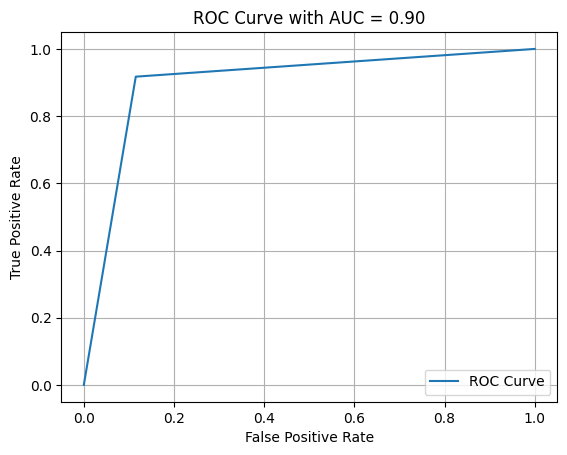

In [27]:
# cross_val_scores = cross_val_score(grid_cv, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = grid_cv.predict_proba(x_test3)[:, 1]

# Obliczanie TPR, FPR i wyznaczanie progów dla krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

# Rysowanie krzywej ROC
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [28]:
ann = tf.keras.models.Sequential()

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [30]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [31]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [33]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
ann.fit(x_train3, y_train3, batch_size = 32, epochs=100,
          validation_data=(x_test3, y_test3), verbose=1,
          callbacks=[early_stop])

Epoch 1/100




11934/11934 [==============================] - 28s 2ms/step - loss: 0.4708 - accuracy: 0.7740 - val_loss: 0.4162 - val_accuracy: 0.8012
Epoch 2/100
11934/11934 [==============================] - 25s 2ms/step - loss: 0.3911 - accuracy: 0.8122 - val_loss: 0.3768 - val_accuracy: 0.8182
Epoch 3/100
11934/11934 [==============================] - 26s 2ms/step - loss: 0.3655 - accuracy: 0.8230 - val_loss: 0.3584 - val_accuracy: 0.8267
Epoch 4/100
11934/11934 [==============================] - 25s 2ms/step - loss: 0.3559 - accuracy: 0.8276 - val_loss: 0.3523 - val_accuracy: 0.8304
Epoch 5/100
11934/11934 [==============================] - 25s 2ms/step - loss: 0.3506 - accuracy: 0.8302 - val_loss: 0.3450 - val_accuracy: 0.8331
Epoch 6/100
11934/11934 [==============================] - 26s 2ms/step - loss: 0.3478 - accuracy: 0.8309 - val_loss: 0.3578 - val_accuracy: 0.8197
Epoch 7/100
11934/11934 [==============================] - 25s 2ms/step - loss: 0.3461 - accuracy: 0.8319 - val_loss: 0.33

In [35]:
ypred_train1 = ann.predict(x_train3)
y_pred_test1 = ann.predict(x_test3)

y_pred_test1 = (y_pred_test1 > 0.5)
ypred_train1 = (ypred_train1 > 0.5)
print(np.concatenate((y_pred_test1.reshape(len(y_pred_test1),1), y_test3.reshape(len(y_test3),1)),1))

3978/3978 [==============================] - 4s 978us/step
[[1 1]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [36]:
accuracy_score(y_test3, y_pred_test1)

0.8475963766920424

In [37]:
print("Training Results\n")
print(classification_report(y_train3, ypred_train1))

Training Results

              precision    recall  f1-score   support

           0       0.83      0.87      0.85    189618
           1       0.86      0.83      0.84    192242

    accuracy                           0.85    381860
   macro avg       0.85      0.85      0.85    381860
weighted avg       0.85      0.85      0.85    381860



In [38]:
print('Testing Results\n')
print(classification_report(y_test3, y_pred_test1))

Testing Results

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     63243
           1       0.87      0.83      0.84     64044

    accuracy                           0.85    127287
   macro avg       0.85      0.85      0.85    127287
weighted avg       0.85      0.85      0.85    127287



   1/3978 [..............................] - ETA: 1:24

3978/3978 [==============================] - 4s 1ms/step


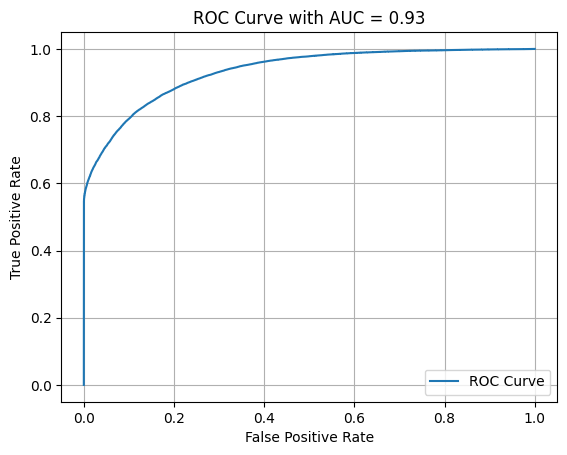

In [39]:
# cross_val_scores = cross_val_score(ann, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = ann.predict(x_test3).flatten()

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [40]:

tf.random.set_seed(42)



model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train3,y_train3,epochs = 100)

Epoch 1/100
11934/11934 [==============================] - 19s 2ms/step - loss: 0.4686 - accuracy: 0.7815
Epoch 2/100
11934/11934 [==============================] - 18s 2ms/step - loss: 0.4010 - accuracy: 0.8186
Epoch 3/100
11934/11934 [==============================] - 17s 1ms/step - loss: 0.3837 - accuracy: 0.8271
Epoch 4/100
11934/11934 [==============================] - 15s 1ms/step - loss: 0.3774 - accuracy: 0.8295
Epoch 5/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.3745 - accuracy: 0.8318
Epoch 6/100
11934/11934 [==============================] - 15s 1ms/step - loss: 0.3679 - accuracy: 0.8321
Epoch 7/100
11934/11934 [==============================] - 15s 1ms/step - loss: 0.3547 - accuracy: 0.8326
Epoch 8/100
11934/11934 [==============================] - 15s 1ms/step - loss: 0.3482 - accuracy: 0.8340
Epoch 9/100
11934/11934 [==============================] - 15s 1ms/step - loss: 0.3457 - accuracy: 0.8346
Epoch 10/100
11934/11934 [====================

In [41]:
model_2.evaluate(x_test3,y_test3)

3978/3978 [==============================] - 4s 925us/step - loss: 0.3451 - accuracy: 0.8345


[0.3450588583946228, 0.8344607353210449]

In [42]:
ypred_train4 = model_2.predict(x_train3)
y_pred_test4 = model_2.predict(x_test3)

y_pred_test4 = (y_pred_test4 > 0.5)
ypred_train4 = (ypred_train4 > 0.5)

print("Training Results\n")
print(classification_report(y_train3,ypred_train4))
print("Testing Results\n")
print(classification_report(y_test3,y_pred_test4))

3978/3978 [==============================] - 3s 824us/step
Training Results

              precision    recall  f1-score   support

           0       0.77      0.95      0.85    189618
           1       0.93      0.73      0.82    192242

    accuracy                           0.83    381860
   macro avg       0.85      0.84      0.83    381860
weighted avg       0.85      0.83      0.83    381860

Testing Results

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     63243
           1       0.93      0.72      0.81     64044

    accuracy                           0.83    127287
   macro avg       0.85      0.84      0.83    127287
weighted avg       0.85      0.83      0.83    127287



   1/3978 [..............................] - ETA: 1:16

3978/3978 [==============================] - 3s 807us/step


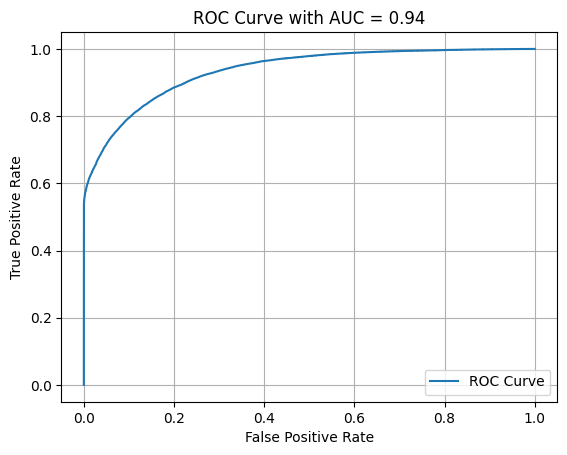

In [43]:
# cross_val_scores = cross_val_score(model_2, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model_2.predict(x_test3).flatten()

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [44]:

tf.random.set_seed(42)



model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(32,activation = 'relu'),
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train3,y_train3,epochs = 100)

Epoch 1/100
11934/11934 [==============================] - 14s 1ms/step - loss: 0.4451 - accuracy: 0.7886
Epoch 2/100
11934/11934 [==============================] - 13s 1ms/step - loss: 0.3664 - accuracy: 0.8219
Epoch 3/100
11934/11934 [==============================] - 13s 1ms/step - loss: 0.3544 - accuracy: 0.8274
Epoch 4/100
11934/11934 [==============================] - 13s 1ms/step - loss: 0.3461 - accuracy: 0.8301
Epoch 5/100
11934/11934 [==============================] - 13s 1ms/step - loss: 0.3402 - accuracy: 0.8333
Epoch 6/100
11934/11934 [==============================] - 13s 1ms/step - loss: 0.3330 - accuracy: 0.8360
Epoch 7/100
11934/11934 [==============================] - 13s 1ms/step - loss: 0.3290 - accuracy: 0.8379
Epoch 8/100
11934/11934 [==============================] - 13s 1ms/step - loss: 0.3266 - accuracy: 0.8397
Epoch 9/100
11934/11934 [==============================] - 13s 1ms/step - loss: 0.3254 - accuracy: 0.8405
Epoch 10/100
11934/11934 [====================

In [45]:
model_22.evaluate(x_test3,y_test3)

3978/3978 [==============================] - 4s 915us/step - loss: 0.3078 - accuracy: 0.8513


[0.30783140659332275, 0.8512652516365051]

In [46]:
ypred_train22 = model_22.predict(x_train3)
y_pred_test22 = model_22.predict(x_test3)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)

print(classification_report(y_train3,ypred_train22))
print(classification_report(y_test3,y_pred_test22))

3978/3978 [==============================] - 3s 818us/step
              precision    recall  f1-score   support

           0       0.81      0.91      0.86    189618
           1       0.90      0.79      0.84    192242

    accuracy                           0.85    381860
   macro avg       0.86      0.85      0.85    381860
weighted avg       0.86      0.85      0.85    381860

              precision    recall  f1-score   support

           0       0.81      0.91      0.86     63243
           1       0.90      0.79      0.84     64044

    accuracy                           0.85    127287
   macro avg       0.86      0.85      0.85    127287
weighted avg       0.86      0.85      0.85    127287



   1/3978 [..............................] - ETA: 1:09

3978/3978 [==============================] - 4s 943us/step


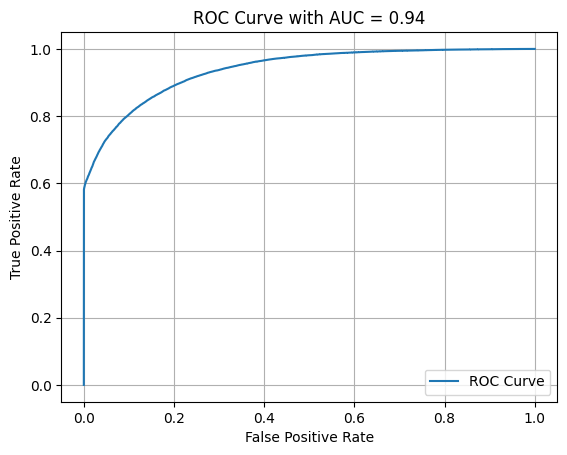

In [47]:
# cross_val_scores = cross_val_score(model_22, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model_22.predict(x_test3).flatten()

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [48]:
model = Sequential()
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
model.fit(x=x_train3, 
          y=y_train3, 
          epochs=100,
          validation_data=(x_test3, y_test3), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100


11934/11934 [==============================] - 17s 1ms/step - loss: 0.5621 - val_loss: 0.5143
Epoch 2/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.5374 - val_loss: 0.5040
Epoch 3/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.5322 - val_loss: 0.5009
Epoch 4/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.5301 - val_loss: 0.4980
Epoch 5/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.5283 - val_loss: 0.4988
Epoch 6/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.5289 - val_loss: 0.4946
Epoch 7/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.5277 - val_loss: 0.4928
Epoch 8/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.5274 - val_loss: 0.4944
Epoch 9/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.5273 - val_loss: 0.4940
Epoch 10/100
11934/11934 [==============================] 

In [50]:
ypred_train5 = model.predict(x_train3)
y_pred_test5 = model.predict(x_test3)

y_pred_test5 = (y_pred_test5 > 0.5)
ypred_train5 = (ypred_train5 > 0.5)

print(classification_report(y_train3,ypred_train5))
print(classification_report(y_test3,y_pred_test5))

3978/3978 [==============================] - 3s 789us/step
              precision    recall  f1-score   support

           0       0.79      0.73      0.76    189618
           1       0.75      0.80      0.78    192242

    accuracy                           0.77    381860
   macro avg       0.77      0.77      0.77    381860
weighted avg       0.77      0.77      0.77    381860

              precision    recall  f1-score   support

           0       0.79      0.73      0.76     63243
           1       0.75      0.80      0.78     64044

    accuracy                           0.77    127287
   macro avg       0.77      0.77      0.77    127287
weighted avg       0.77      0.77      0.77    127287



   1/3978 [..............................] - ETA: 1:10

3978/3978 [==============================] - 4s 887us/step


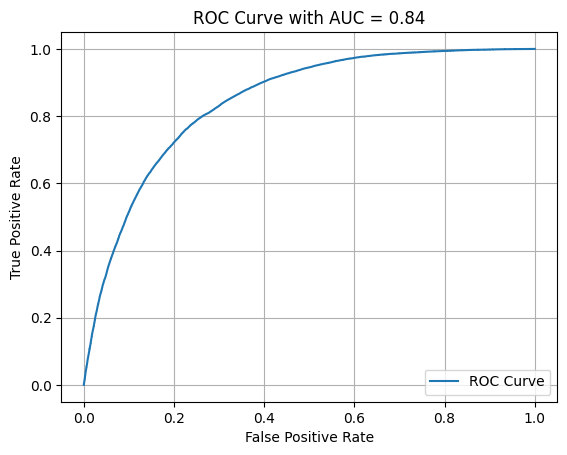

In [51]:
# cross_val_scores = cross_val_score(model, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model.predict(x_test3).flatten()

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [52]:
model1 = Sequential()



model1.add(Dense(16,  activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(10, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(units=1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam')

In [53]:
model1.fit(x=x_train3, 
          y=y_train3, 
          epochs=100,
          validation_data=(x_test3, y_test3), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100


11934/11934 [==============================] - 17s 1ms/step - loss: 0.5166 - val_loss: 0.4566
Epoch 2/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.4785 - val_loss: 0.4398
Epoch 3/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.4697 - val_loss: 0.4325
Epoch 4/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.4655 - val_loss: 0.4299
Epoch 5/100
11934/11934 [==============================] - 16s 1ms/step - loss: 0.4643 - val_loss: 0.4239
Epoch 6/100
11934/11934 [==============================] - 14s 1ms/step - loss: 0.4625 - val_loss: 0.4209
Epoch 7/100
11934/11934 [==============================] - 14s 1ms/step - loss: 0.4612 - val_loss: 0.4195
Epoch 8/100
11934/11934 [==============================] - 14s 1ms/step - loss: 0.4601 - val_loss: 0.4209
Epoch 9/100
11934/11934 [==============================] - 14s 1ms/step - loss: 0.4581 - val_loss: 0.4220
Epoch 10/100
11934/11934 [==============================] 

In [54]:
ypred_train7 = model1.predict(x_train3)
y_pred_test7 = model1.predict(x_test3)

y_pred_test7 = (y_pred_test7 > 0.5)
ypred_train7 = (ypred_train7 > 0.5)

print(classification_report(y_train3,ypred_train7))
print(classification_report(y_test3,y_pred_test7))

3978/3978 [==============================] - 3s 740us/step
              precision    recall  f1-score   support

           0       0.84      0.77      0.80    189618
           1       0.79      0.85      0.82    192242

    accuracy                           0.81    381860
   macro avg       0.81      0.81      0.81    381860
weighted avg       0.81      0.81      0.81    381860

              precision    recall  f1-score   support

           0       0.84      0.76      0.80     63243
           1       0.79      0.85      0.82     64044

    accuracy                           0.81    127287
   macro avg       0.81      0.81      0.81    127287
weighted avg       0.81      0.81      0.81    127287



   1/3978 [..............................] - ETA: 1:06

3978/3978 [==============================] - 3s 792us/step


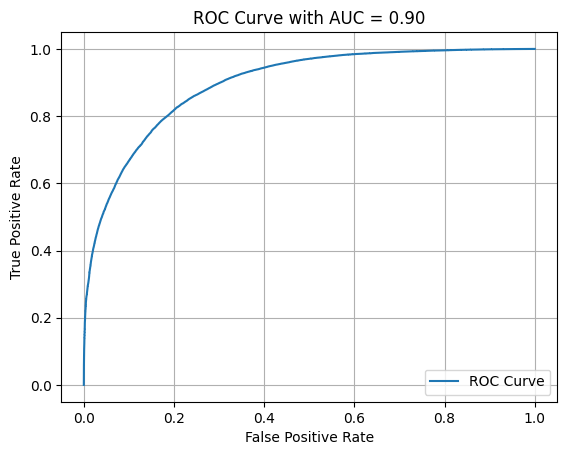

In [55]:
# cross_val_scores = cross_val_score(model1, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model1.predict(x_test3).flatten()

fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [56]:
# model3 = SVC(probability=True)

In [57]:
# model3.fit(x_train3,y_train3)

In [58]:
# ypred_train9 = model3.predict(x_train3)
# y_pred_test9 = model3.predict(x_test3)


# print(classification_report(y_train3,ypred_train9))
# print(classification_report(y_test3,y_pred_test9))

In [59]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [60]:
# grid.fit(x_train3,y_train3)

In [61]:
# grid.best_params_

In [62]:
# grid.best_estimator_

In [63]:
# ypred_train = grid.predict(x_train3)
# y_pred_test = grid.predict(x_test3)


# print(classification_report(y_train3,ypred_train))
# print(classification_report(y_test3,y_pred_test))

In [64]:

# y_proba_test = grid.predict_proba(x_test3)[:, 1]

# fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)

# plt.plot(fpr, tpr, label='ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

Training Results

              precision    recall  f1-score   support

           0       0.83      0.85      0.84    189618
           1       0.85      0.82      0.84    192242

    accuracy                           0.84    381860
   macro avg       0.84      0.84      0.84    381860
weighted avg       0.84      0.84      0.84    381860

Testing Results

              precision    recall  f1-score   support

           0       0.82      0.85      0.84     63243
           1       0.85      0.82      0.83     64044

    accuracy                           0.83    127287
   macro avg       0.83      0.83      0.83    127287
weighted avg       0.83      0.83      0.83    127287



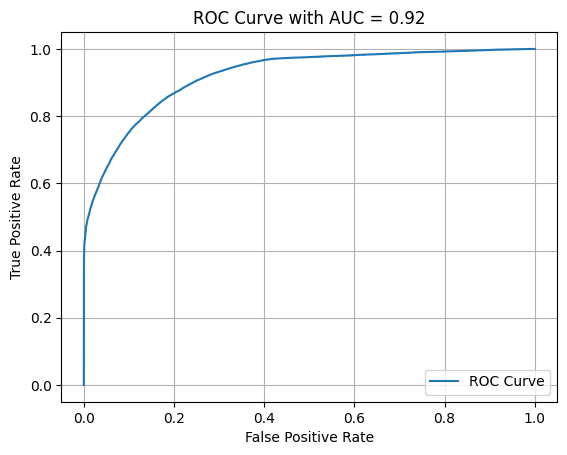

In [8]:
model3 = SVC(C=0.1, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train3, y_train3)

ypred_train14 = model3.predict(x_train3)
y_pred_test14 = model3.predict(x_test3)

print("Training Results\n")
print(classification_report(y_train3, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test3, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train3, y_train3, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model3.predict_proba(x_test3)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test3, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test3, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()